In [8]:
import pandas as pd
import json
# with open('/root/trading_systems/kucoin_dir/kucoin_data_collection_v1/2024-11-19_10-00_BFT/BTF_data_match.json','r')as f:
#     data = json.load(f)
with open('/root/trading_systems/kucoin_dir/kucoin_release_data_initial/old_data_structure/2024-11-21_10-00_MORPHO/MORPHO_match_data.json','r')as f:
    data = json.load(f)
# with open('/root/trading_systems/kucoin_dir/kucoin_data_collection_v1/2024-11-22_11-00_SLERF/SLERF_match_data.json','r')as f:
#     data = json.load(f)
#
cleaned_data = []
for i in data:
    if 'data' in i:
        i =i['data']
        cleaned_data.append(i)
    if 'price' in i:
        cleaned_data.append(i)



In [9]:

df = pd.DataFrame(cleaned_data)
df

,price,sequence,side,size,symbol,time,tradeId,type,time_before_que.put,seconds_from_release,time_after_queue.get,makerOrderId,takerOrderId
0,0.75,5552094992807937,sell,1,MORPHO-USDT,1732183200000000000,5552094992807937,match,10:00:00.096,0.096028,10:00:00.096,NaN,NaN
1,0.75,5552094992807937,sell,1,MORPHO-USDT,1732183200000000000,5552094992807937,match,10:00:00.096,0.096028,10:00:00.096,NaN,NaN
2,2.0057,5552095074859009,buy,5,MORPHO-USDT,1732183200270000000,5552095074859009,match,10:00:00.322,0.322378,10:00:00.322,673f04a06967d30007c87fab,673f04a0cf286a000703c8eb
3,2.0057,5552095074859009,buy,5,MORPHO-USDT,1732183200270000000,5552095074859009,match,10:00:00.322,0.322378,10:00:00.322,673f04a06967d30007c87fab,673f04a0cf286a000703c8eb
4,2.0057,5552095082854401,buy,20,MORPHO-USDT,1732183200289000000,5552095082854401,match,10:00:00.339,0.339993,10:00:00.340,673f04a06967d30007c87fab,673f04a0088f0100076d2458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,1.4989,5552116837660679,buy,2.89,MORPHO-USDT,1732183258636000000,5552116837660679,match,10:00:58.686,58.686799,10:00:58.686,673f04da0d85530007e4cfcf,673f04da37061e00070a17f2
554,1.4551,5552117105833985,sell,25.8,MORPHO-USDT,1732183259374000000,5552117105833985,match,10:00:59.425,59.425365,10:00:59.425,673f04daae93cc00078e5cdc,673f04dbcf286a000704ff9f
555,1.4551,5552117105833985,sell,25.8,MORPHO-USDT,1732183259374000000,5552117105833985,match,10:00:59.425,59.425365,10:00:59.425,673f04daae93cc00078e5cdc,673f04dbcf286a000704ff9f
556,1.455,5552117105833988,sell,13.74,MORPHO-USDT,1732183259374000000,5552117105833988,match,10:00:59.425,59.425549,10:00:59.425,673f04da4fe7460007c0c9bd,673f04dbcf286a000704ff9f


In [10]:
# import datetime
# def convert(timestamp):
#     # Convert microseconds to seconds
#     time_in_seconds = int(timestamp) / 1_000_000_000

#     # Convert to a datetime object
#     human_readable_time = datetime.datetime.fromtimestamp(time_in_seconds)
#     readable_time = human_readable_time.strftime('%H:%M:%S.%f')

#     return readable_time

# df['time'] = df['time'].apply(convert)
# df

<class 'str'>


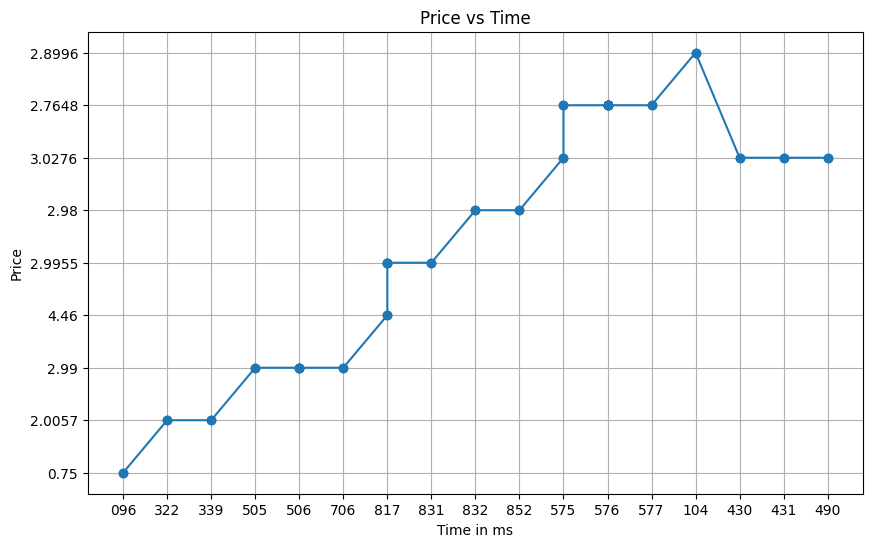

In [13]:
import matplotlib.pyplot as plt
# Plot the data
df2 = df.copy()
df2 = df2.head(50)
print(type(df['time_before_que.put'][0]))
df2['time_before_que.put'] = df2['time_before_que.put'].str.split('.').str[1]



plt.figure(figsize=(10, 6))
plt.plot(df2['time_before_que.put'], df2['price'], marker='o', linestyle='-')
plt.xlabel('Time in ms')
plt.ylabel('Price')
plt.title('Price vs Time')
plt.grid(True)
plt.show()


In [12]:

# Convert 'time' column to datetime
df['datetime'] = pd.to_datetime(df['time'], unit='ns')

# Resample data by second and aggregate buy/sell pressures
resampled = (
    df.groupby([pd.Grouper(key='datetime', freq='S'), 'side'])['size']
    .sum()
    .unstack(fill_value=0)
    .rename(columns={'buy': 'Buy Pressure', 'sell': 'Sell Pressure'})
)

# Plot the results
plt.figure(figsize=(10, 6))
resampled.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Buying and Selling Pressure Over Time")
plt.xlabel("Time")
plt.ylabel("Order Size")
plt.legend(title="Order Type")
plt.grid(True)
plt.tight_layout()
plt.show()

OutOfBoundsDatetime: Parsing "1732183200000000000" to datetime overflows, at position 0